In [1]:
# using LinearAlgebra
# using DifferentialEquations
# using SparseArrays
# using Arpack
using PyPlot
# using Distributions
# using QuadGK
# using CSV
using Interpolations
using DelimitedFiles
using JLD2 

In [2]:
cl_by_z_89deg_15kv = readdlm("cl_by_z_89deg_15kv.dat");
cl_by_z_89deg_20kv = readdlm("cl_by_z_89deg_20kv.dat");
cl_by_z_89deg_25kv = readdlm("cl_by_z_89deg_25kv.dat");
cl_by_z_89deg_30kv = readdlm("cl_by_z_89deg_30kv.dat");
cl_by_z_89deg_35kv = readdlm("cl_by_z_89deg_35kv.dat");
cl_by_z_89deg_40kv = readdlm("cl_by_z_89deg_40kv.dat");

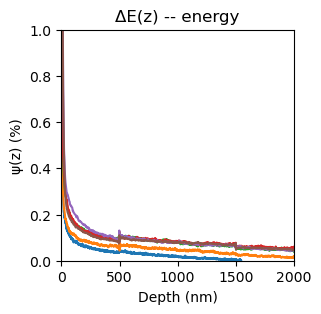

In [3]:
figure(figsize=(3,3));
plot(cl_by_z_89deg_15kv[:,1],cl_by_z_89deg_15kv[:,2])
plot(cl_by_z_89deg_20kv[:,1],cl_by_z_89deg_20kv[:,2])
plot(cl_by_z_89deg_25kv[:,1],cl_by_z_89deg_25kv[:,2])
plot(cl_by_z_89deg_30kv[:,1],cl_by_z_89deg_30kv[:,2])
plot(cl_by_z_89deg_35kv[:,1],cl_by_z_89deg_35kv[:,2])
plot(cl_by_z_89deg_40kv[:,1],cl_by_z_89deg_40kv[:,2])
xlabel("Depth (nm)")
ylabel("ψ(z) (%)")
xlim(0,2000)
ylim(0,1)
title("ΔE(z) -- energy")
# blue = 85, orange = 86, green = 87, red = 88, purple = 89;

In [4]:
cl_by_z_89deg_15kv_fn = LinearInterpolation(cl_by_z_89deg_15kv[:,1],cl_by_z_89deg_15kv[:,2]);
cl_by_z_89deg_20kv_fn = LinearInterpolation(cl_by_z_89deg_20kv[:,1],cl_by_z_89deg_20kv[:,2]);
cl_by_z_89deg_25kv_fn = LinearInterpolation(cl_by_z_89deg_25kv[:,1],cl_by_z_89deg_25kv[:,2]);
cl_by_z_89deg_30kv_fn = LinearInterpolation(cl_by_z_89deg_30kv[:,1],cl_by_z_89deg_30kv[:,2]);
cl_by_z_89deg_35kv_fn = LinearInterpolation(cl_by_z_89deg_35kv[:,1],cl_by_z_89deg_35kv[:,2]);
cl_by_z_89deg_40kv_fn = LinearInterpolation(cl_by_z_89deg_40kv[:,1],cl_by_z_89deg_40kv[:,2]);

In [5]:
Etot15 = sum(cl_by_z_89deg_15kv_fn.([500:1:1500;]));
Etot20 = sum(cl_by_z_89deg_20kv_fn.([500:1:1500;]));
Etot25 = sum(cl_by_z_89deg_25kv_fn.([500:1:1500;]));
Etot30 = sum(cl_by_z_89deg_30kv_fn.([500:1:1500;]));
Etot35 = sum(cl_by_z_89deg_35kv_fn.([500:1:1500;]));
Etot40 = sum(cl_by_z_89deg_40kv_fn.([500:1:1500;]));

In [61]:
envals_kev = [15:5:40;];
en_loss_weighted_fn = LinearInterpolation(envals_kev,[15*Etot15, 20*Etot20, 25*Etot25, 30*Etot30, 35*Etot35, 40*Etot40]/(40*Etot40));
en_loss_prob_fn = LinearInterpolation(envals_kev,[Etot15, Etot20, Etot25, Etot30, Etot35, Etot40]/(100));

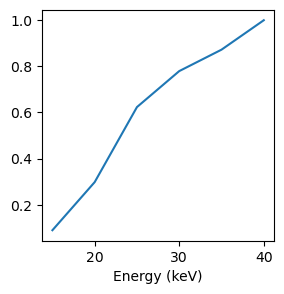

PyObject Text(0.5, 23.999999999999993, 'Energy (keV)')

In [62]:
envals_kev = [15:0.1:40;];
figure(figsize=(3,3));
plot(envals_kev, en_loss_weighted_fn.(envals_kev),linestyle="-")
xlabel("Energy (keV)")

In [63]:
@save "ene_data.jld2" envals_kev = envals_kev ene_loss = en_loss_prob_fn.(envals_kev)

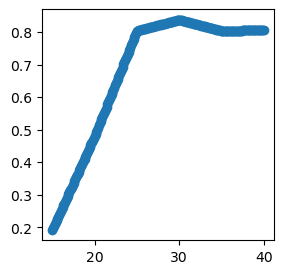

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcd2c8aae50>

In [64]:
figure(figsize=(3,3));
plot(envals_kev,en_loss_prob_fn.(envals_kev),linestyle="",marker="o")